Posterior Beta(175, 82)
Posterior mean = 0.680934
Posterior standard deviation = 0.029019
P(p > 0.7 | data) = 0.259053
Predictive prob that a single future patient recovers within 3 days = 0.680934
For m = 20 future patients, P(proportion >= 70%) = 0.534816 (threshold = 14 successes)


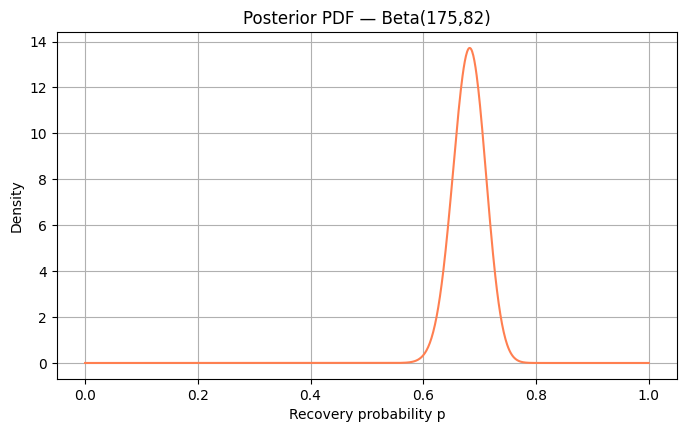

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import beta, betabinom

# Data
n = 255
successes = 174
failures = n - successes

# Prior: uniform Beta(1,1)
alpha0, beta0 = 1, 1

# Posterior parameters
alpha_post = alpha0 + successes
beta_post = beta0 + failures

# Posterior mean and standard deviation
post_mean = alpha_post / (alpha_post + beta_post)
post_var = (alpha_post * beta_post) / ((alpha_post + beta_post)**2 * (alpha_post + beta_post + 1))
post_sd = sqrt(post_var)

# Probability that p > 0.7 under the posterior
prob_gt_07 = 1 - beta.cdf(0.7, alpha_post, beta_post)

# Posterior predictive for one future patient = posterior mean
pred_one = post_mean

# Posterior predictive distribution for m future patients (Beta-Binomial)
m = 20  # example: next 20 patients
threshold = int(np.ceil(0.7 * m))
k = np.arange(0, m+1)
pmf = betabinom.pmf(k, m, alpha_post, beta_post)
prob_prop_gt_07_m = pmf[k >= threshold].sum()

print(f"Posterior Beta({alpha_post}, {beta_post})")
print(f"Posterior mean = {post_mean:.6f}")
print(f"Posterior standard deviation = {post_sd:.6f}")
print(f"P(p > 0.7 | data) = {prob_gt_07:.6f}")
print(f"Predictive prob that a single future patient recovers within 3 days = {pred_one:.6f}")
print(f"For m = {m} future patients, P(proportion >= 70%) = {prob_prop_gt_07_m:.6f} (threshold = {threshold} successes)")

# Plot the posterior PDF
x = np.linspace(0, 1, 1000)
y = beta.pdf(x, alpha_post, beta_post)
plt.figure(figsize=(8,4.5))
plt.plot(x, y, color='coral')
plt.title("Posterior PDF — Beta({},{})".format(alpha_post, beta_post))
plt.xlabel("Recovery probability p")
plt.ylabel("Density")
plt.grid(True)
plt.show()
